## Observations and Insights 

The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens.
In this study, 249 mice identified with SCC tumor growth were treated 
through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured.
The first step was to revise the data integrity; there were no missing values but one duplicated was found and discarded.

Findings:
    
    *The Bar Chart shows Capomulin and Ramicane drug treatments with the higher number of mices treated.
    
    *The Pie Chart incicates there's not significative difference on the amount of mices Females or Males in the analysis.
    
    *The only treatment that has outliers is Infubinol.
    
    *The mouse (b128) treated with Capimulin shows a positive reponse decreacing the Tumor Volume as the Timepoint increased.
    
    *With the Scatter Plot we can see the Mice Weight and Tumor Volume may have a positive linear relashionship.
    
    *With a Correlation Coefficient of 0.88 we can conclude there is a large positive linear relationship between Mice Weight and Tumor Volume.
    
    *With a r-square of 0.768 we can account 76.8% of the Tumor Volume variability deppends of Weight.
    

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import sklearn.datasets as dta
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
merge_pd = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merge_pd.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
#Checking rows with missing data
merge_pd.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
# Checking the number of mice.
mouse_count=merge_pd['Mouse ID'].value_counts()
number_of_mouse=len(mouse_count)
number_of_mouse

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse=merge_pd.loc[merge_pd.duplicated(subset=["Mouse ID","Timepoint",]),"Mouse ID"]
dup_mouse

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [8]:
#Showing Data
mouse_dup=pd.DataFrame (merge_pd[['Mouse ID','Timepoint']])
mouse_dup.sort_values("Mouse ID", inplace =True)
bool_series=mouse_dup[["Mouse ID","Timepoint"]].duplicated()
mouse_dup[bool_series]

,Mouse ID,Timepoint
911,g989,5
913,g989,10
908,g989,0
916,g989,20
915,g989,15


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_pd.sort_values("Mouse ID", inplace =True)
bool_series=merge_pd[["Mouse ID","Timepoint"]].duplicated()
merge_pd[bool_series]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
908,g989,Propriva,Female,21,26,0,45.000000,0
916,g989,Propriva,Female,21,26,20,55.326122,1
915,g989,Propriva,Female,21,26,15,53.442020,0


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_pd[merge_pd["Mouse ID"].isin(dup_mouse)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1


In [11]:
# Checking the number of mice in the clean DataFrame.
nodup_mouse_count=clean_df['Mouse ID'].value_counts()
number_of_nodup_mouse=len(nodup_mouse_count)
number_of_nodup_mouse

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#Mean
drug_mean=clean_df.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
drug_mean

#Median
drug_median=clean_df.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
drug_median

#Variance
drug_variance=clean_df.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
drug_variance

#Standard Deviation
drug_std=clean_df.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
drug_std

#SEM
drug_sem=clean_df.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]
drug_sem

#Summary Statistics Table 
summary_statistics=pd.DataFrame({"Mean":drug_mean,"Median":drug_median,"Variance":drug_variance,
                                 "Standard Deviation":drug_std,"SEM":drug_sem})
summary_statistics


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
clean_df.groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

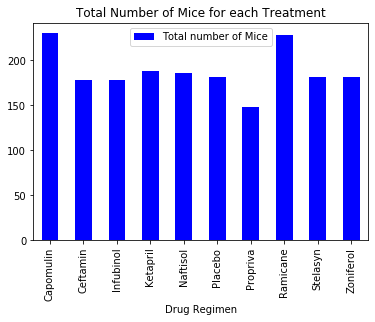

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_by_treatment=clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mouse_by_treatment
df=pd.DataFrame({"Total number of Mice":(mouse_by_treatment)})
df
bar_plot=df.plot.bar( y="Total number of Mice",rot=90,title="Total Number of Mice for each Treatment",color="blue",legend=True)


Text(0.5, 1.0, 'Total Number of Mice for each Treatment ')

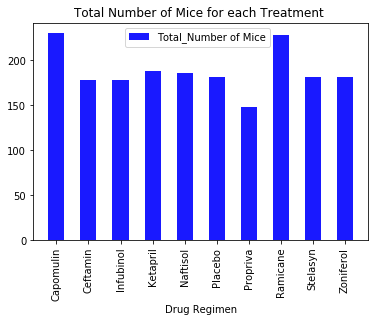

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mouse_by_treatment=clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mouse_by_treatment
y_axis=mouse_by_treatment
x_axis=np.arange(len(y_axis))
tick_locations=[value for value in x_axis]

plt.bar(x_axis,y_axis, align="center", alpha=0.9,color="blue", width=0.5,label="Total_Number of Mice")

plt.legend(loc='upper center', bbox_to_anchor=(.49,1))
plt.xticks(tick_locations,list(mouse_by_treatment.index),rotation="vertical")
plt.xlabel("Drug Regimen")
plt.title("Total Number of Mice for each Treatment ")


In [16]:
#Group by Gender
gender=clean_df.groupby(["Sex"]).count()
gender
gender_df=pd.DataFrame(gender['Mouse ID'])
gender_df

,Mouse ID
Sex,
Female,922
Male,958


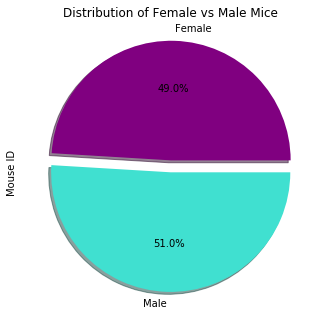

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot=gender_df.plot.pie(y="Mouse ID",title="Distribution of Female vs Male Mice",
autopct='%1.1f%%',figsize=(5.5,5.5),colors=['purple','turquoise'],shadow=True,explode=(0.1,0),legend=False)


<function matplotlib.pyplot.show(*args, **kw)>

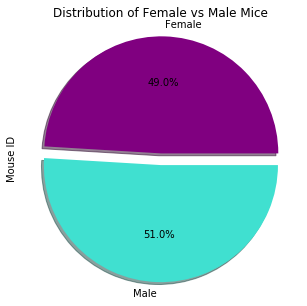

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_list=list(gender.index.values)
genders=gender['Mouse ID']
colors=['purple','turquoise']
explode=(0.1,0)
plt.pie(genders,labels=gender_list, colors=colors,autopct="%1.1f%%",shadow=True,explode = explode)
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Mouse ID")
plt.axis("equal")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


#METHOD 1

capomulin=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
ramicane=clean_df.loc[clean_df["Drug Regimen"]=="Ramicane"]
infubinol=clean_df.loc[clean_df["Drug Regimen"]=="Infubinol"]
ceftamin=clean_df.loc[clean_df["Drug Regimen"]=="Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#Capomulin last (greatest) timepoint for each mouse and merge with the original dataframe
capo_tp_last=capomulin.groupby('Mouse ID').max()['Timepoint']
capo_tp_last_df=pd.DataFrame(capo_tp_last)
capomulin_merge=pd.merge(capo_tp_last_df,clean_df, on =("Mouse ID","Timepoint"),how="left")


#Ramicane last (greatest) timepoint for each mouse and merge with the original dataframe
rami_tp_last=ramicane.groupby('Mouse ID').max()['Timepoint']
rami_tp_last_df=pd.DataFrame(rami_tp_last)
ramicane_merge=pd.merge(rami_tp_last_df,clean_df, on =("Mouse ID","Timepoint"),how="left")


#Infubinol (greatest) timepoint for each mouse and merge with the original dataframe
infu_tp_last=infubinol.groupby('Mouse ID').max()['Timepoint']
infu_tp_last_df=pd.DataFrame(infu_tp_last)
infubinol_merge=pd.merge(infu_tp_last_df,clean_df, on =("Mouse ID","Timepoint"),how="left")


#Ceftamin (greatest) timepoint for each mouse and merge with the original dataframe
ceft_tp_last=ceftamin.groupby('Mouse ID').max()['Timepoint']
ceft_tp_last_df=pd.DataFrame(ceft_tp_last)
ceftamin_merge=pd.merge(ceft_tp_last_df,clean_df, on =("Mouse ID","Timepoint"),how="left")


In [20]:
#Capomulin
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_vol=capomulin_merge['Tumor Volume (mm3)']

quartiles = capomulin_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 32.37735684
The upper quartile of Tumor Volume (mm3) is: 40.1592203
The interquartile range of Tumor Volume (mm3) is: 7.781863460000004
The the median of Tumor Volume (mm3) is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [21]:
#Ramicane
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ramicane_vol=ramicane_merge['Tumor Volume (mm3)']

quartiles = ramicane_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 31.56046955
The upper quartile of Tumor Volume (mm3) is: 40.65900627
The interquartile range of Tumor Volume (mm3) is: 9.098536719999998
The the median of Tumor Volume (mm3) is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [22]:
#Infubinol
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
infubinol_vol=infubinol_merge['Tumor Volume (mm3)']

quartiles = infubinol_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 54.04860769
The upper quartile of Tumor Volume (mm3) is: 65.52574285
The interquartile range of Tumor Volume (mm3) is: 11.477135160000003
The the median of Tumor Volume (mm3) is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [23]:
#Ceftamin
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ceftamin_vol=ceftamin_merge['Tumor Volume (mm3)']

quartiles = ceftamin_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 48.72207785
The upper quartile of Tumor Volume (mm3) is: 64.29983003
The interquartile range of Tumor Volume (mm3) is: 15.577752179999997
The the median of Tumor Volume (mm3) is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create list to fill tumor vol data (for plotting)
tumor_volume=[capomulin_vol,ramicane_vol,infubinol_vol,ceftamin_vol]

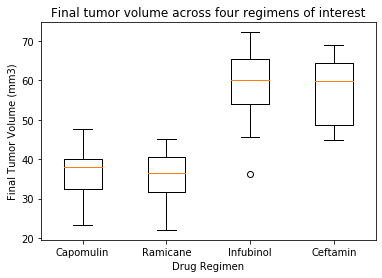

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume across four regimens of interest')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_volume, labels=treatments)
plt.show()

## Line and Scatter Plots

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capo_b128_data=clean_df[clean_df["Mouse ID"].isin(["b128"])]
capo_b128_data_sort=capo_b128_data.sort_values(by="Timepoint",ascending=True)
capo_b128_data_sort

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


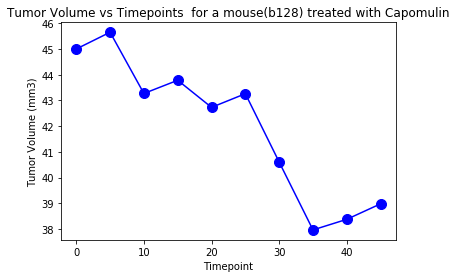

In [27]:
x_axis = capo_b128_data_sort["Timepoint"]
y_axis=capo_b128_data_sort["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis,markersize=10,marker="o", color="blue")
plt.title('Tumor Volume vs Timepoints  for a mouse(b128) treated with Capomulin')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_mean_vol=capomulin_merge.groupby(["Mouse ID"]).mean()
capo_mean_vol



,Timepoint,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,45,9,22,38.982878,2
b742,45,7,21,38.939633,0
f966,20,16,17,30.485985,0
g288,45,3,19,37.074024,1
g316,45,22,22,40.159220,2
i557,45,1,24,47.685963,1
i738,45,23,20,37.311846,2
j119,45,7,23,38.125164,1
j246,35,21,21,38.753265,1


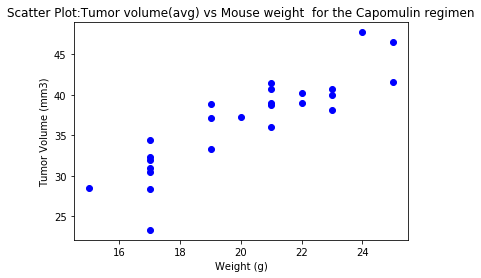

In [29]:
plt.scatter(capo_mean_vol['Weight (g)'],capo_mean_vol['Tumor Volume (mm3)'], color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Scatter Plot:Tumor volume(avg) vs Mouse weight  for the Capomulin regimen")
plt.show()

## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capo_mean_vol['Weight (g)'],capo_mean_vol['Tumor Volume (mm3)'])
print(f"The correlation for mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

The correlation for mouse weight and average tumor volume for the Capomulin regimen is 0.88


The r-squared is: 0.7686134812139006


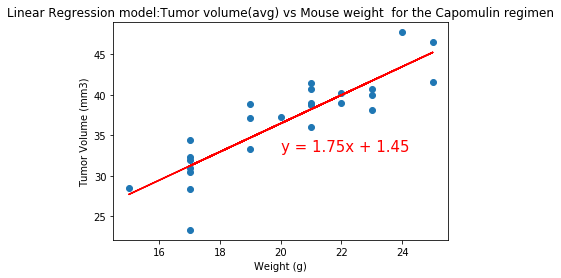

In [31]:
x_values = capo_mean_vol['Weight (g)']
y_values = capo_mean_vol['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,33),fontsize=15,color="red")
plt.title('Linear Regression model:Tumor volume(avg) vs Mouse weight  for the Capomulin regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")